In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [21]:
# Define the kinetic paramters and the concentration of total DNA
# kinetic parameters with assumed units:
aM = 15.1745   # 1/hr, transcription rate per nM of free DNA
aP = 1         # 1/hr, translation rate per nM of mRNA
aF = 1         # 1/hr, conversion rate from protein to repressor
bM = 1         # 1/hr, mRNA degradation rate
bP = 1         # 1/hr, protein degradation rate
bF = 1         # 1/hr, repressor degradation rate
kf = 200       # 1/(nM·hr), binding rate constant for free DNA and repressor
kb = 50        # 1/hr, unbinding rate constant for the DNA-repressor complex
DT = 164.75    # nM, total DNA concentration


In [42]:
# Define the ODE system of the full model
def full_model(t, y):


  M, P, F, DR, DA = y

  # Calculate derivatives
  dMdt =aM*DA-bM*M
  dPdt=aP*M-bP*P
  dFdt=aF*P-bF*F+ kb*DR-kf*DA*F
  dDRdt = (kf * DA * F) - (kb*DR)-(bF*DR)
  dDAdt = (-kf * DA * F) + (kb * DR) + (bF*DR)
  # return derivates
  return [dMdt, dPdt, dFdt, dDRdt, dDAdt]






def tQSSA_reduced_model(t, y):
  M,P,R=y
  A = kf
  B = - (kf*(DT + R) + (kb + bF))
  C = kf * DT * R
  discriminant = B**2 - 4 * A * C
  # Choose the physically meaningful root:
  DR = (-B - np.sqrt(discriminant)) / (2 * A)
  DA = DT - DR

  dMdt = aM * DA - bM * M
  dPdt = aP * M - bP * P
  dRdt = aF * P - bF * (R)

  return [dMdt, dPdt, dRdt]



In [43]:
# Initial condition for the full model
M0, P0, F0, DR0, DA0 = 0, 0, 0, 0, DT  # Start with all DNA in active form
y0_full = [M0, P0, F0, DR0, DA0]

# Initial condition for the reduced model
M0, P0, R0 = 0, 0, 0  # Start with all DNA in active form
y0_reduced = [M0, P0, R0]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

In [44]:
# Solve ODEs

# Solution trajectories of the full model
solution1 = solve_ivp(full_model, t_span, y0_full, t_eval=t_eval)


# Solution trajectories of the reduced model
solution2 = solve_ivp(tQSSA_reduced_model, t_span, y0_reduced, t_eval=t_eval)


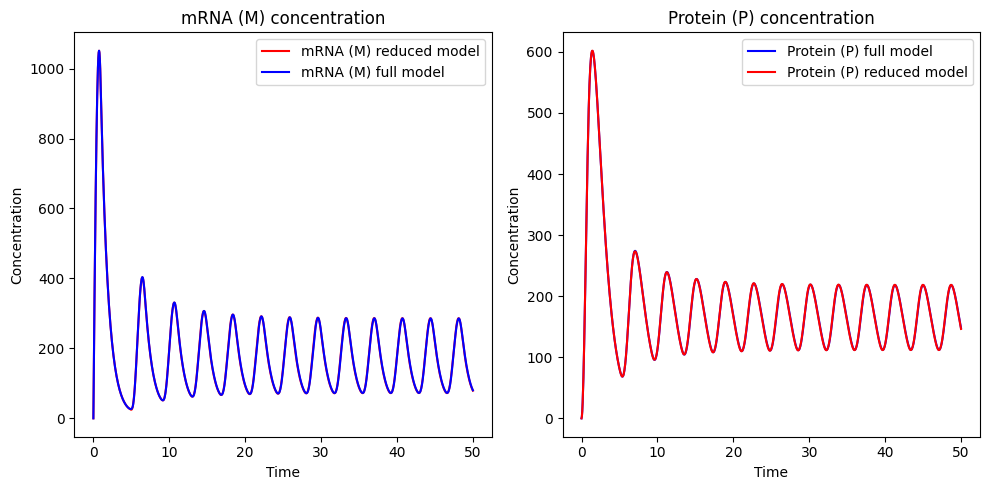

In [45]:
# Plot results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].plot(solution2.t, solution2.y[0], label="mRNA (M) reduced model", color = 'red')
axes[0].plot(solution1.t, solution1.y[0], label="mRNA (M) full model", color = 'blue')

axes[0].set_title('mRNA (M) concentration')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Concentration')
axes[0].legend()

axes[1].plot(solution1.t, solution1.y[1], label="Protein (P) full model", color = 'blue')
axes[1].plot(solution2.t, solution2.y[1], label="Protein (P) reduced model", color = 'red')
axes[1].set_title('Protein (P) concentration')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Concentration')
axes[1].legend()

plt.tight_layout()
plt.show()